In [103]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [104]:
students = pd.read_csv("studentData.csv")
methods = pd.read_csv("methodData.csv")
modules = pd.read_csv("moduleData.csv")
teams = pd.read_csv("teamData.csv")
indAggResponses = pd.read_csv("indAggResponses.csv")
teamAggResponses = pd.read_csv("teamAggResponses.csv")

In [105]:
teamAggResponses.head()

,Unnamed: 0,Team,Module,Chosen Method,Reason,Decision Process
0,0,Team 1,1,1:1 Interview,Since our team is focusing on creating a produ...,Our team agreed to use the 1:1 Interview metho...
1,1,Team 1,1,Open Card Sorting,We decided to go with the open card sorting me...,"Initially, our team was choosing between close..."
2,2,Team 1,1,AEIOU,The AEIOU method will allow us to observe unde...,We decided that the AEIOU method would enable ...
3,3,Team 2,1,1:1 Interview,We are trying to improve the current medical p...,Since we all come from different background. E...
4,4,Team 2,1,Community Appraisal,Since we would like encourage a sense of commu...,There is a strong argument to be made about wh...


In [106]:
teamReasonsByModule = teamAggResponses.groupby(['Module', 'Chosen Method'])['Reason'].apply(lambda lst: ' '.join(lst)).to_frame()
teamReasonsByModule = teamReasonsByModule.reset_index()
teamReasonsByModule.head()

,Module,Chosen Method,Reason
0,1,1:1 Interview,Since our team is focusing on creating a produ...
1,1,AEIOU,The AEIOU method will allow us to observe unde...
2,1,Community Appraisal,Since we would like encourage a sense of commu...
3,1,Competitive Analysis,"Overall, the reason why competitive analysis w..."
4,1,Open Card Sorting,We decided to go with the open card sorting me...


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
v = TfidfVectorizer()
cvec2 = CountVectorizer(stop_words='english', min_df=1, max_df=.5, ngram_range=(1,2))

In [108]:
from itertools import islice
cvec2.fit(teamReasonsByModule.Reason)
list(islice(cvec2.vocabulary_.items(), 20))

[('app appropriate', 194),
 ('listless think', 2065),
 ('uncommon', 3625),
 ('additional', 81),
 ('multiple stages', 2321),
 ('app', 193),
 ('quickly realized', 2906),
 ('pr medical', 2649),
 ('silent', 3198),
 ('botton', 353),
 ('like brainwriting', 2025),
 ('reveal specific', 3066),
 ('efficiency', 1102),
 ('needs different', 2370),
 ('student ûªs', 3365),
 ('personal', 2562),
 ('creating stress', 790),
 ('deeply', 889),
 ('improve prototype', 1760),
 ('property method', 2832)]

In [109]:
cvec3 = CountVectorizer(stop_words='english', min_df=1, max_df=.5, ngram_range=(1,3))
cvec3.fit(teamReasonsByModule.Reason)
list(islice(cvec3.vocabulary_.items(), 20))

[('help finding wrong', 2787),
 ('used chose design', 6368),
 ('concept mapping analysis', 1083),
 ('botton', 599),
 ('listless think', 3576),
 ('user experience feeling', 6406),
 ('actually aims', 108),
 ('connected people solution', 1147),
 ('quickly realized', 5057),
 ('pr medical', 4596),
 ('reveal specific', 5324),
 ('efficiency', 1919),
 ('needs different', 4130),
 ('student ûªs', 5814),
 ('personal', 4453),
 ('creating stress', 1362),
 ('improve prototype', 3062),
 ('sets', 5501),
 ('student groups time', 5813),
 ('condition ensured', 1115)]

In [110]:
cvec_counts = cvec2.transform(teamReasonsByModule.Reason)
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (43, 3961)
nonzero count: 5303
sparsity: 3.11%


In [111]:
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec2.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(20)

,occurrences,term
2728,48,process
2764,43,product
900,42,design
3450,40,team
1680,37,ideas
3694,28,user
3711,25,users
3532,23,time
2268,23,methods
3738,22,using


In [112]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<43x3961 sparse matrix of type '<class 'numpy.float64'>'
	with 5303 stored elements in Compressed Sparse Row format>

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english', ngram_range=(1,2))
tvec_weights = tvec.fit_transform(teamReasonsByModule.Reason.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(40)

,term,weight
1286,feedback,0.015844
3023,round,0.013891
1586,helps,0.013377
2766,prototype,0.013044
1449,generate,0.011442
189,app,0.011330
3180,sorting,0.011264
581,community,0.011229
447,character,0.011017
2100,matrix,0.010779


## tf-idf on indidivual methods chosen and not chosen

In [114]:
selMethodsI = indResp[indResp.Selected == "True"]
tvec_weights = tvec.fit_transform(selMethodsI.Reason.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).reset_index().drop(["index"], axis=1).head(50)

,term,weight
0,good,0.019121
1,great,0.018098
2,group,0.016984
3,helps,0.016359
4,allows,0.016274
5,time,0.016237
6,different,0.016056
7,information,0.016025
8,need,0.014769
9,understand,0.014731


Standout words: "time", "different", "quickly", "effective", "use", "need"

In [115]:
notselMethodsI = indResp[indResp.Selected == "False"]
tvec_weights = tvec.fit_transform(notselMethodsI.Reason.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).reset_index().drop(["index"], axis=1).head(50)

,term,weight
0,ideas,0.021916
1,don,0.020053
2,group,0.017736
3,like,0.016906
4,choose,0.016724
5,project,0.016229
6,used,0.016079
7,team,0.016039
8,need,0.015614
9,problem,0.014753


Standout words: "time consuming", "limited", "difficult"

## Run tf-idf on Modules


### Research

In [135]:
resSelMethodsI = indResp[(indResp.Module == "Research") & (indResp.Selected == "True")]
tvec_weights = tvec.fit_transform(resSelMethodsI.Reason.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).reset_index().drop(["index"], axis=1).head(50)

,term,weight
0,products,0.016173
1,people,0.016144
2,helps,0.015096
3,like,0.014960
4,need,0.014819
5,identify,0.014770
6,know,0.014465
7,market,0.013765
8,good,0.013615
9,easily,0.013504


In [132]:
resNSelMethodsI = indResp[(indResp.Module == "Research") & (indResp.Selected == "False")]
tvec_weights = tvec.fit_transform(resNSelMethodsI.Reason.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).reset_index().drop(["index"], axis=1).head(50)

,term,weight
0,manager,0.021322
1,group,0.019291
2,aeiou,0.018327
3,focus,0.017142
4,don,0.015125
5,think,0.014592
6,limited,0.014176
7,user,0.013421
8,focus group,0.013024
9,methods,0.013009


### Analysis

In [133]:
analSelMethodsI = indResp[(indResp.Module == "Analysis") & (indResp.Selected == "True")]
tvec_weights = tvec.fit_transform(analSelMethodsI.Reason.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).reset_index().head(50)

,index,term,weight
0,1084,ideas,0.014839
1,1208,interview,0.013737
2,1745,problem,0.013395
3,1364,map,0.013384
4,2226,thinking,0.012361
5,1577,organize,0.012214
6,1505,need,0.011757
7,1038,helps,0.011308
8,1803,project,0.011199
9,53,allow,0.011164


In [134]:
analNSelMethodsI = indResp[(indResp.Module == "Analysis") & (indResp.Selected == "False")]
tvec_weights = tvec.fit_transform(analNSelMethodsI.Reason.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).reset_index().head(50)

,index,term,weight
0,3391,problem,0.013577
1,2946,need,0.013160
2,4377,time consuming,0.013145
3,848,consuming,0.013145
4,1813,good,0.012640
5,135,analysis,0.012575
6,1213,difficult,0.012376
7,999,data,0.012275
8,576,choose,0.011722
9,3457,product,0.011383


In [119]:
modules

,Unnamed: 0,Module,Module #
0,0,Research,1
1,1,Analysis,2
2,2,Ideate,3
3,3,Build,4
4,4,Communicate,5


# Graphs

In [120]:
# parse list representation of lists in teams to actual list
import ast
teams['SID'] = teams['SID'].apply(ast.literal_eval)

In [121]:
teams['key'] = 1
indAggResponseswTeams = pd.merge(indAggResponses, teams, on='key')
matchingStudTeams = [indAggResponseswTeams['SID_x'][i] in indAggResponseswTeams['SID_y'][i] 
                     for i in range(indAggResponseswTeams.shape[0])]
indAggResponseswTeams = indAggResponseswTeams[matchingStudTeams]
indAggResponseswTeams = indAggResponseswTeams.reset_index().drop(['index', 'Unnamed: 0_x', 
                                                                  'key', 'SID_y', 'Name', 'Email Address', 
                                                                  'Unnamed: 0_y', 'Familiar'], axis=1)
indResp = indAggResponseswTeams
indResp.head()

,SID_x,Module #,Module,Method,MID,Selected,Reason,Team
0,S_0,1.0,Research,1:1 Interview,M_0,True,"I've never used this method, despite know abou...",Team 4
1,S_0,1.0,Research,AEIOU,M_1,False,Because in my routine as Product Manager and B...,Team 4
2,S_0,1.0,Research,Closed Card Sorting,M_2,False,Because in my routine as Product Manager and B...,Team 4
3,S_0,1.0,Research,Community Appraisal,M_3,False,"As a Product Manager and Business Manager, I b...",Team 4
4,S_0,1.0,Research,Competitive Analysis,M_4,False,"As a Product Manager and Business Manager, I b...",Team 4


In [122]:
teamMethods = teamAggResponses.drop(['Unnamed: 0', 'Decision Process'], axis=1)
teamMethods.head()

,Team,Module,Chosen Method,Reason
0,Team 1,1,1:1 Interview,Since our team is focusing on creating a produ...
1,Team 1,1,Open Card Sorting,We decided to go with the open card sorting me...
2,Team 1,1,AEIOU,The AEIOU method will allow us to observe unde...
3,Team 2,1,1:1 Interview,We are trying to improve the current medical p...
4,Team 2,1,Community Appraisal,Since we would like encourage a sense of commu...


In [123]:
# Group responses by module
#indResp.groupby(['Module #', 'Method']).describe()
modMethodsI = indResp[indResp['Selected'] == 'True'].groupby(['Module #', 'Method']).describe()
modMethodsI = modMethodsI.reset_index()[['Module #', 'Method', 'Module']]
#modMethodsI.columns = modMethodsI.columns.droplevel()
modMethodsI.head()

Module #                Method Module                      
                                  count unique       top freq
0      1.0         1:1 Interview      4      1  Research    4
1      1.0                 AEIOU     12      1  Research   12
2      1.0   Closed Card Sorting      5      1  Research    5
3      1.0   Community Appraisal      3      1  Research    3
4      1.0  Competitive Analysis     12      1  Research   12

In [124]:
# Visualization tools
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

In [125]:
methodsbyT = teamAggResponses.groupby(['Module', 'Chosen Method']).describe().reset_index().iloc[:, [0, 1, 2]]
methodsbyT.columns = ['Module #', 'Method', 'count']
methodsbyT.head()

,Module #,Method,count
0,1,1:1 Interview,6.0
1,1,AEIOU,5.0
2,1,Community Appraisal,1.0
3,1,Competitive Analysis,2.0
4,1,Open Card Sorting,1.0


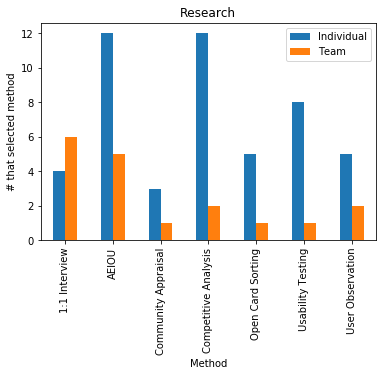

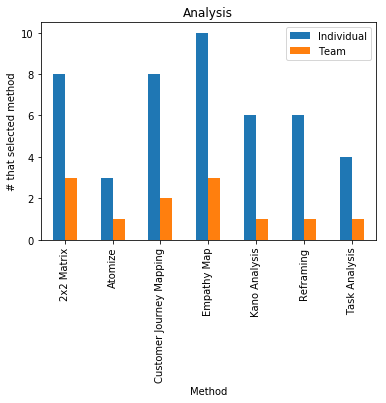

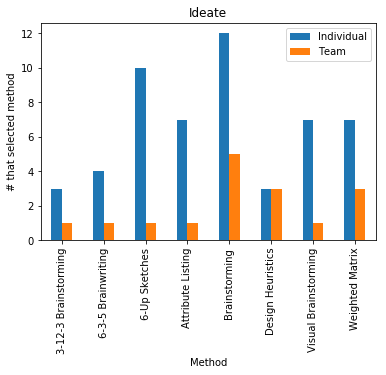

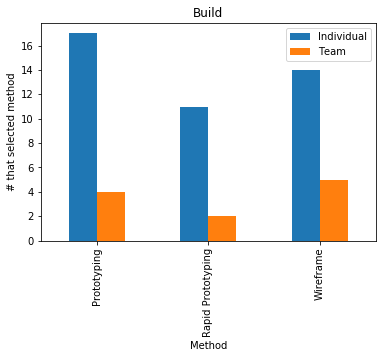

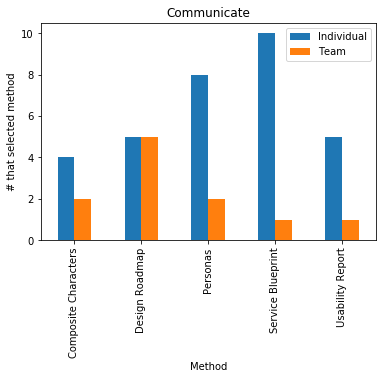

In [126]:
# Aggregated Method Selection by Module
for m in range(1,5+1):
    selMethods = modMethodsI[modMethodsI['Module #'] == m]
    selMethods.columns = ["Module #", "Method", "count", "unique", "Module", "freq"]#selMethods.columns.droplevel()
    selMethods = selMethods.reset_index()
    selMethodsT = methodsbyT[methodsbyT["Module #"] == m]
    #selMethods = selMethods.drop(['count'], axis=1)
    
    #selMethods[['Method', 'count']].plot(kind='bar', x='Method', legend=None)
    #selMethodsT[['Method', 'count']].plot(kind='bar', x='Method', legend=None)
    mergedTable = pd.merge(selMethods, selMethodsT, on="Method")[['Method', 'count_x', 'count_y']]
    mergedTable.columns = ['Method', 'Individual', 'Team']
    
    mergedTable.plot(kind='bar', x='Method', legend=["Individual", "Team"])
    plt.ylabel('# that selected method')
    plt.title(selMethods['Module'][0])
    plt.show()

In [127]:
indMethodsbyT = indResp[indResp['Selected'] == 'True'].groupby(['Module #', 'Team', 'Method']).describe()
indMethodsbyT = indMethodsbyT.reset_index()[['Module #', 'Team', 'Method', 'Module']]
#indMethodsbyT.columns = ['Module #', 'Team', 'Method', 'count', 'unique', 'Module', 'freq']
#indMethodsbyT.drop(['unique', 'freq'], axis=1, inplace=True)

In [128]:
indMethodsbyT.head()

Module #    Team                Method Module                      
                                          count unique       top freq
0      1.0  Team 1                 AEIOU      1      1  Research    1
1      1.0  Team 1  Competitive Analysis      2      1  Research    2
2      1.0  Team 1     Conjoint Analysis      3      1  Research    3
3      1.0  Team 1    Design Ethnography      1      1  Research    1
4      1.0  Team 1           Focus Group      1      1  Research    1

In [129]:
methodsbyT[methodsbyT["Module #"] == 1]

,Module #,Method,count
0,1,1:1 Interview,6.0
1,1,AEIOU,5.0
2,1,Community Appraisal,1.0
3,1,Competitive Analysis,2.0
4,1,Open Card Sorting,1.0
5,1,Usability Testing,1.0
6,1,User Observation,2.0


In [130]:
modules

,Unnamed: 0,Module,Module #
0,0,Research,1
1,1,Analysis,2
2,2,Ideate,3
3,3,Build,4
4,4,Communicate,5
